# Step 3: Hypothesis 2

Video’s met een hoger aantal comments vertonen een significant hoger aantal views.

In [100]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Get the data from the previous step
videos = pd.read_excel('../output/videos.xlsx', index_col='id')

## 3.1 Data Exploration

In [66]:
# Explore the data structure for videos
videos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, KNNAUcLMJpo to C3INoqCqwjE
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                510 non-null    object 
 1   publish_date         510 non-null    object 
 2   duration             510 non-null    object 
 3   views                510 non-null    int64  
 4   likes                510 non-null    int64  
 5   dislikes             510 non-null    int64  
 6   shares               510 non-null    int64  
 7   comments             510 non-null    int64  
 8   engagement           510 non-null    float64
 9   views_24h            510 non-null    int64  
 10  views_1w             510 non-null    int64  
 11  views_2w             509 non-null    float64
 12  views_1m             510 non-null    int64  
 13  views_2m             509 non-null    float64
 14  views_3m             484 non-null    float64
 15  likes_24h            510 no

In [69]:
# Get a statistical summary of the video data
videos.describe()

,views,likes,dislikes,shares,comments,engagement,views_24h,views_1w,views_2w,views_1m,...,comments_2w,comments_1m,comments_2m,comments_3m,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,509.000000,510.000000,...,509.000000,510.000000,509.000000,484.000000,510.000000,510.000000,509.000000,510.000000,509.000000,484.000000
mean,9697.178431,98.452941,5.692157,150.772549,13.984314,2.557765,1466.223529,2835.847059,3261.092338,3660.982353,...,5.414538,5.886275,6.387033,7.084711,3.962490,3.326000,3.195363,3.070647,2.959430,2.873657
std,19792.876939,173.476146,11.468473,508.850088,30.230544,0.881494,1602.489446,3635.835643,4130.855539,4615.818106,...,6.015978,6.482772,7.724431,9.274682,1.693031,1.324181,1.238335,1.144629,1.055782,1.028733
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2759.000000,32.000000,1.000000,29.000000,2.000000,2.030000,612.000000,959.500000,1099.000000,1232.500000,...,2.000000,2.000000,2.000000,2.000000,2.665000,2.402500,2.300000,2.290000,2.250000,2.220000
50%,5208.500000,59.000000,3.000000,61.000000,6.000000,2.500000,934.000000,1704.000000,1998.000000,2265.500000,...,3.000000,4.000000,4.000000,4.000000,3.930000,3.350000,3.220000,3.155000,3.000000,2.955000
75%,10060.000000,110.750000,6.000000,136.250000,13.000000,3.097500,1668.500000,2985.500000,3321.000000,3914.000000,...,7.000000,7.750000,8.000000,9.000000,5.062500,4.180000,4.020000,3.790000,3.650000,3.542500
max,363712.000000,2795.000000,127.000000,8202.000000,332.000000,6.300000,13045.000000,40815.000000,41529.000000,42000.000000,...,55.000000,59.000000,84.000000,87.000000,10.230000,7.930000,7.690000,7.690000,6.660000,6.430000


In [70]:
# Show the first 10 videos
videos.head(10)

,title,publish_date,duration,views,likes,dislikes,shares,comments,engagement,views_24h,...,comments_2w,comments_1m,comments_2m,comments_3m,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m
id,,,,,,,,,,,,,,,,,,,,,
KNNAUcLMJpo,Veggie 🥕 of vlees 🍖?,2024-07-25T07:35:04Z,0:19,987,12,3,3,1,1.32,575,...,1.0,1,1.0,1.0,1.22,1.46,1.37,1.40,1.30,1.28
KCc98U0fVJ8,Zomerpodcast opnemen op het Nerdland Festival!...,2022-06-22T20:47:49Z,0:21,1011,21,1,1,0,2.08,206,...,0.0,0,0.0,0.0,1.94,1.76,1.65,1.76,2.01,1.86
bl9LxOG4kV8,Zitten we in een financiële bubbel? #WetenSNAP,2022-10-31T15:00:08Z,1:55,1763,28,0,9,1,2.16,502,...,1.0,1,1.0,1.0,3.59,2.67,2.45,2.29,2.25,2.26
fn1dz5Xez0E,Bestaan bijna - doodervaringen echt?,2024-11-02T13:30:21Z,0:41,846,25,0,4,1,3.55,447,...,1.0,1,1.0,1.0,4.03,4.17,4.04,4.03,3.86,3.78
2Uw331k0AdE,Leer je beter wanneer je beweegt?,2024-09-12T14:29:09Z,0:34,1304,38,1,8,1,3.53,705,...,1.0,1,1.0,1.0,3.83,3.77,3.72,3.71,3.59,3.69
9wj7AkDaH3E,Dit element is cruciaal voor de geestelijke ge...,2024-12-14T15:00:16Z,0:32,755,20,0,1,0,2.78,531,...,0.0,0,0.0,NaN,2.82,2.82,2.74,2.68,2.79,NaN
GqVjUd2vUjM,Wat maakt de Poolster zo bijzonder?,2024-09-09T13:12:26Z,0:22,933,22,0,7,1,3.22,483,...,1.0,1,1.0,1.0,4.14,3.40,3.37,3.37,3.30,3.23
FXhLtCTX7_o,Twee dingen die jij kan doen als je buur net i...,2024-12-20T15:00:25Z,0:33,616,11,0,3,0,2.27,430,...,0.0,0,0.0,NaN,1.40,2.00,2.07,2.01,2.14,NaN
RIkqRlCa3Ps,Kan jij dit wiskunderaadsel oplossen?,2024-09-23T14:32:13Z,0:35,1303,16,2,3,3,1.53,697,...,2.0,2,2.0,2.0,1.72,1.54,1.50,1.53,1.36,1.42


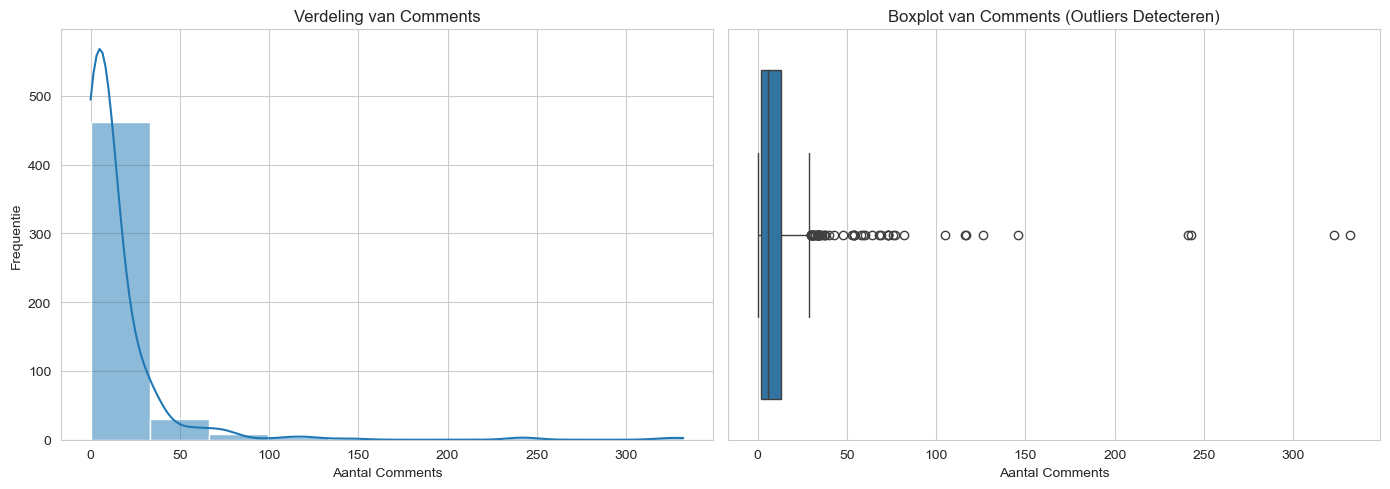

In [71]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of comments
sns.histplot(videos['comments'], bins=10, kde=True, ax=axes[0])
axes[0].set_xlabel('Aantal Comments')
axes[0].set_ylabel('Frequentie')
axes[0].set_title('Verdeling van Comments')

# Boxplot to check for outliers
sns.boxplot(x=videos['comments'], ax=axes[1])
axes[1].set_xlabel('Aantal Comments')
axes[1].set_title('Boxplot van Comments (Outliers Detecteren)')

# Show the plots
plt.tight_layout()
plt.show()

1.	Histogram van comments (links)
    - De verdeling is sterk scheef naar rechts (rechtsscheve verdeling).
    - De meeste video’s hebben minder dan 50 comments.
    - Er zijn enkele video’s met veel meer comments (meer dan 100).
2. Boxplot van comments (rechts)
    - Veel video’s hebben lage aantallen comments (0-50).
    - Er zijn veel outliers (punten rechts van de boxplot).
    - Video’s met meer dan 50 comments worden als outliers beschouwd.


- Een log-transformatie normaliseert een scheve verdeling, zodat het eenvoudiger is om te gebruiken bij statistische analyses.
- Een log-transformatie helpt bij het detecteren van een lineair verband

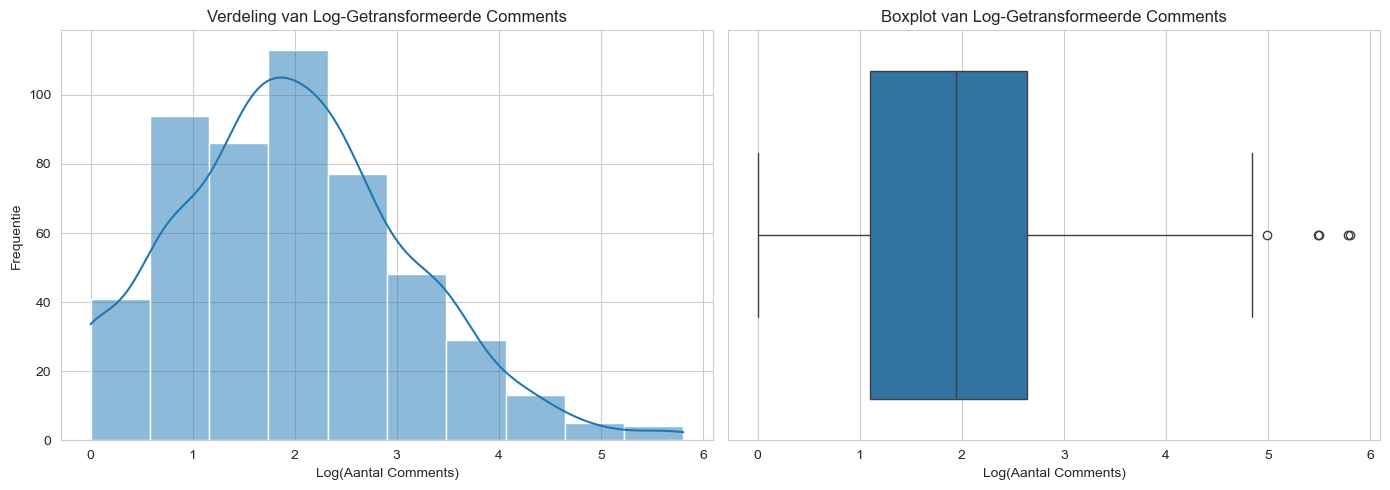

In [74]:
# Log-transformatie van comments (log1p gebruikt log(1+x) om nullen te vermijden)
videos['log_comments'] = np.log1p(videos['comments'])

# Visualiseren van de log-getransformeerde verdeling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram van log-comments
sns.histplot(videos['log_comments'], bins=10, kde=True, ax=axes[0])
axes[0].set_xlabel('Log(Aantal Comments)')
axes[0].set_ylabel('Frequentie')
axes[0].set_title('Verdeling van Log-Getransformeerde Comments')

# Boxplot om outliers opnieuw te bekijken
sns.boxplot(x=videos['log_comments'], ax=axes[1])
axes[1].set_xlabel('Log(Aantal Comments)')
axes[1].set_title('Boxplot van Log-Getransformeerde Comments')

# Show plots
plt.tight_layout()
plt.show()

In [80]:
# Log-transformatie van views, likes, shares, and comments
videos['log_views'] = np.log1p(videos['views'])
videos['log_likes'] = np.log1p(videos['likes'])
videos['log_dislikes'] = np.log1p(videos['dislikes'])
videos['log_shares'] = np.log1p(videos['shares'])
videos['log_comments'] = np.log1p(videos['comments'])

## 3.2 Hypotheses Testing

1️⃣ Histogram van Log(Aantal Comments) (links)
- De verdeling is minder scheef
    - De oorspronkelijke verdeling was sterk rechtsscheef (veel video’s met weinig comments, enkele met veel).
    - De log-transformatie heeft dit genormaliseerd, waardoor de data meer gelijkmatig verdeeld is.
- Betere spreiding voor analyse
    - De waarden zijn nu gecomprimeerd in een bereik tussen 0 en 6.
    - Dit helpt bij regressieanalyse, omdat extreme waarden minder invloed hebben.

2️⃣ Boxplot van Log(Aantal Comments) (rechts)
- Minder extreme outliers
    - In de oorspronkelijke boxplot waren er veel extreme uitschieters.
    - Nu blijven er maar een paar echte outliers over (met log-comments boven 5).
- Meer robuuste statistische analyse mogelijk
    - Door de log-transformatie zullen regressiemodellen minder last hebben van extreme waarden.
    - Dit zal de betrouwbaarheid van correlaties en regressies verbeteren.

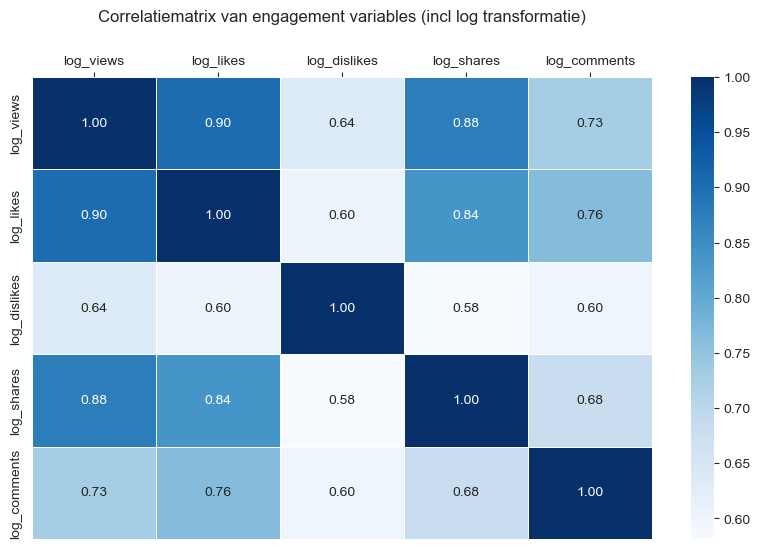

In [91]:
# Create correlation matrix for statistical analysis
correlation_matrix = videos[['log_views', 'log_likes', 'log_dislikes', 'log_shares', 'log_comments']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.title('Correlatiematrix van engagement variables (incl log transformatie)', pad=40)

# Show the plot
plt.show()

📌 Hypothese:<br>
“Video’s met een hoger aantal comments vertonen een significant hoger aantal views.”
<br>
🔍 Belangrijkste observaties:<br>
- Correlatie tussen log_comments en log_views = 0.73 → Er is een duidelijke positieve relatie, maar het is niet de sterkste correlatie.
- Sterkere correlaties met views:
    - log_likes (0.90) → Likes zijn sterker gecorreleerd met views dan comments.
    - log_shares (0.88) → Shares zijn ook een betere voorspeller voor views dan comments.
    - Dislikes correleren zwakker met andere engagement-metrics (0.58 - 0.64).
<br>

✅ Conclusie:
- Comments hebben een positieve invloed op views, maar zijn niet de sterkste voorspeller.
- Shares en likes hebben een grotere impact op het aantal views.
- De hypothese is gedeeltelijk correct, maar het is nuttig om ook shares en likes mee te nemen in verdere analyses.

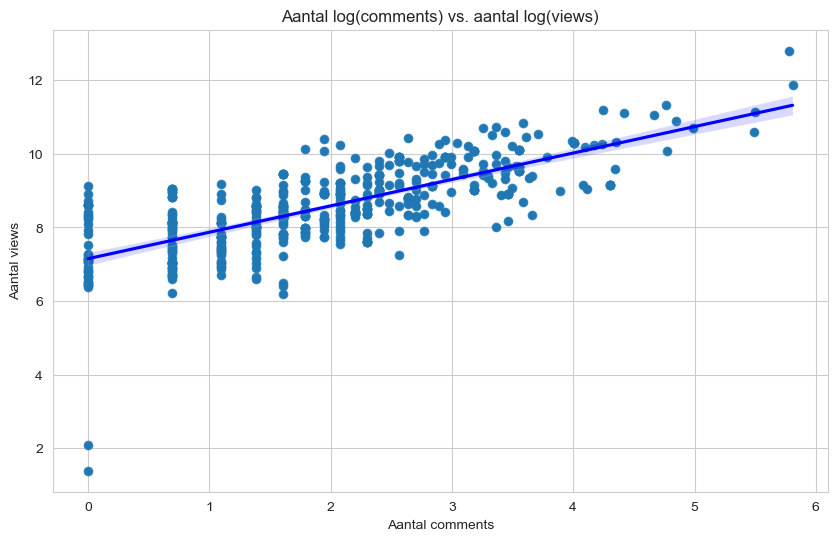

In [92]:
# Comments and views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=videos['log_comments'], y=videos['log_views'])
sns.regplot(x=videos['log_comments'], y=videos['log_views'], scatter=True, line_kws={'color': 'blue'})
plt.title('Aantal log(comments) vs. aantal log(views)')
plt.xlabel('Aantal comments')
plt.ylabel('Aantal views')
plt.show()

🔍 Wat zien we in de grafiek?

- Positieve correlatie: Er is een duidelijke opwaartse trend, wat betekent dat video’s met meer comments gemiddeld ook meer views hebben.
- De regressielijn volgt een lineair patroon: Dit bevestigt dat de relatie tussen comments en views exponentieel was in de originele schaal, maar lineair wordt na de log-transformatie.
- Minder effect van outliers: Door de log-transformatie worden extreme waarden beter gehanteerd, waardoor het model betrouwbaarder is.

<br>
📈 Betekent dit dat meer comments zorgen voor meer views?

- De sterke correlatie suggereert dat video’s met veel comments meestal ook veel views hebben.
- Causaliteit is echter niet bewezen: Het kan ook zijn dat video’s met veel views meer reacties uitlokken, in plaats van andersom.

In [97]:
# Lineair regression

# Calc correlation (and check if it matches the matrix)
correlation = videos[['log_views', 'log_comments']].corr().iloc[0, 1]
print(f'Correlatie tussen comments en views: {correlation:.3f}')

# Set up regression model
X = videos['log_comments']
X = sm.add_constant(X)  # Intercept
y = videos['log_views']

# Fit a linear regression model
model = sm.OLS(y, X).fit()
model.summary()

Correlatie tussen comments en views: 0.730


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     578.3
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           6.90e-86
Time:                        11:37:09   Log-Likelihood:                -587.77
No. Observations:                 510   AIC:                             1180.
Df Residuals:                     508   BIC:                             1188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.1506      0.068    105.350      0.000       7.017       7.284
log_comments     0.7181      0.030     24.049      0.000       0.659       0.777
==============================================================================
Omnibus:                      184.406   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1840.994
Skew:                          -1.278   Prob(JB):                         0.00
Kurtosis:                      11.950   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

🎉 Resultaten
<br><br>
1️⃣ Algemene modelprestaties:
<br>
| Statistiek | Waarde | Interpretatie                                                                                                                                                |
|------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| R² (R-squared)|0.532| 53.2% van de variantie in views wordt verklaard door comments. Dit is een matige tot sterke relatie, maar er zijn ook andere factoren die views beïnvloeden. |
|Adj. R²|0.531| Aangepaste R² is bijna gelijk aan R², wat betekent dat de toevoeging van deze predictor nuttig is.
F-statistiek|578.3| Zeer hoog, dus model is significant.                                                                                                                         |
|Prob (F-statistic)|6.90e-86| p-waarde ≈ 0, dus model is extreem significant.                                                                                                              |
<br><br>

2️⃣ Coëfficiënten:
<br>
| Variabele | Coëfficiënt | p-waarde | Interpretatie                                                                                                                                                |
|----------|--------------|----------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| Intercept (const)|7.1506|0.000| Wanneer log(comments) = 0, dan is log(views) gemiddeld 7.15. Dit betekent dat bij 1 comment (log(1) = 0), het verwachte aantal views ongeveer 1,284 is (exp(7.15) ≈ 1284 views).|
|log_comments|0.7181|0.000| Een 1% toename in comments resulteert in een 0.72% toename in views. Dit is een sterk en significant effect.|

❗️Belangrijk: Omdat we met log-waarden werken, is de interpretatie relatief in procenten, niet absoluut.
<br><br>

3️⃣ Diagnostiek en model validiteit:
<br>
| Test | Waarde | Interpretatie                                                                                                                                                |
|------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Omnibus-test (Prob Omnibus)|0.000| Residu's zijn niet normaal verdeeld.|
|Skewness |-1.278| Negatief scheef, er zijn mogelijk meer lage dan hoge fouten.|
|Kurtosis|11.950| Hoge piek, extreme waarden of outliers in de fouten.|
|Durbin-Watson|1.581| Dicht bij 2, geen sterke autocorrelatie in de residuen.|

❗️De niet-normale verdeling van residuen suggereert dat er mogelijk nog niet-gemeten factoren zijn die views beïnvloeden.<br>
❗️De hoge kurtosis duidt op mogelijk nog aanwezige outliers in de dataset.
<br><br>

📌 Conclusie

1.	Sterk positief verband tussen log(comments) en log(views). → Meer comments leiden gemiddeld tot meer views.
2. Elke 1% stijging in comments leidt tot een 0.72% stijging in views.
3.	Model verklaart 53.2% van de variantie in views, wat redelijk goed is, maar er zijn waarschijnlijk meer factoren die views beïnvloeden (bv. likes, shares, videoduur, etc.).
4.	Residu’s vertonen enige afwijking van een normale verdeling, dus verder diagnostisch onderzoek kan nuttig zijn.


In [99]:
# MVT regression (controle van impact andere vars)
features = ['log_comments', 'log_likes', 'log_shares', 'log_dislikes']
X_multi = videos[features]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(videos['log_views'], X_multi).fit()
model_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     838.1
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          2.41e-221
Time:                        11:49:26   Log-Likelihood:                -263.12
No. Observations:                 510   AIC:                             536.2
Df Residuals:                     505   BIC:                             557.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5645      0.100     45.437      0.000       4.367       4.762
log_comments     0.0290      0.026      1.135      0.257      -0.021       0.079
log_likes        0.6252      0.042     15.026      0.000       0.543       0.707
log_shares       0.2972      0.024     12.563      0.000       0.251       0.344
log_dislikes     0.1176      0.027      4.376      0.000       0.065       0.170
==============================================================================
Omnibus:                      126.255   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2476.487
Skew:                          -0.516   Prob(JB):                         0.00
Kurtosis:                      13.746   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

🎉 Resultaten
<br><br>
1️⃣ Algemene modelprestaties:
<br>
| Statistiek | Waarde | Interpretatie                                                                                                                                                |
|------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| R² (R-squared)|0.869| Het model verklaart 86.9% van de variantie in views, wat zeer sterk is. |
|Adj. R²|0.868| Aangepaste R² is bijna gelijk aan R², wat betekent dat alle variabelen nuttig zijn.
F-statistiek|838.1| Zeer hoog, dus model is zeer significant.                                                                                                                         |
|Prob (F-statistic)|2.41e-221| De kans dat dit model geen voorspellende waarde heeft, is praktisch 0.                                                                                                              |
<br><br>

2️⃣ Coëfficiënten:
<br>
| Variabele | Coëfficiënt | p-waarde | Interpretatie                                                                                                                                                |
|----------|--------------|----------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| Intercept (const)|4.5645|0.000| Wanneer alle engagement-metrics 0 zijn, is log(views) gemiddeld 4.56 (≈96 views in de originele schaal: exp(4.56) ≈ 96).|
|log_comments|0.0290|0.257| Niet significant. Het effect van comments verdwijnt zodra we andere engagement-metrics meenemen.|
|log_likes|0.6252|0.000| Sterk significant. Likes hebben de grootste positieve impact op views.|
|log_dislikes|0.1176|0.000| Significant, maar het effect is kleiner dan likes en shares.|
|log_shares|0.2972|0.000| Zeer significant. Shares zijn een belangrijke voorspeller van views.|

❗️Comments hadden in een enkelvoudige regressie een effect op views, maar dat verdwijnt als we andere engagement-metrics meenemen.<br>
❗️Likes en shares zijn de sterkste voorspellers van views.<br>
❗️Dislikes hebben een klein, maar significant effect, mogelijk omdat controversiële content meer bekeken wordt.
<br><br>

3️⃣ Diagnostiek en model validiteit:
<br>
| Test | Waarde | Interpretatie                                                                                                                                                |
|------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Omnibus-test (Prob Omnibus)|0.000| Residu's zijn niet normaal verdeeld.|
|Skewness |-0.516| Lichte negatieve scheefheid. |
|Kurtosis|13.746| Hoge piek, extreme waarden of outliers in de fouten.|
|Durbin-Watson|1.707| Dicht bij 2, geen sterke autocorrelatie in de residuen.|

❗️De niet-normale verdeling van residuen suggereert dat er mogelijk nog niet-gemeten factoren zijn die views beïnvloeden.<br>
❗️De hoge kurtosis duidt op mogelijk nog aanwezige outliers in de dataset.
<br><br>

📌 Conclusie

1. Comments voorspellen views niet meer wanneer andere engagement-metrics worden meegenomen. --> Dit ondermijnt de oorspronkelijke hypothese, omdat het effect van comments indirect lijkt te zijn via likes en shares.
2. Likes en shares zijn de dominante factoren die views beïnvloeden.
    - Elke 1% stijging in likes verhoogt views met 0.63%.
    - Elke 1% stijging in shares verhoogt views met 0.30%.
3.	Dislikes hebben een kleine, maar significante impact op views --> Dit suggereert dat negatieve feedback ook engagement creëert.
4.	Het model verklaart 86.9% van de variatie in views, wat zeer sterk is.

In [101]:
# VIF test to check multicollinearity in the regression model

# Data VIF-test
X_vif = videos[['log_comments', 'log_likes', 'log_shares', 'log_dislikes']]
X_vif = sm.add_constant(X_vif) # Intercept

# Calc VIF for each value
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Toon resultaten
print("\n🎉 Variance Inflation Factor (VIF) testresultaten:")
vif_data


🎉 Variance Inflation Factor (VIF) testresultaten:


,Feature,VIF
0,const,31.017690
1,log_comments,2.605958
2,log_likes,4.419015
3,log_shares,3.460508
4,log_dislikes,1.740042


🎉 Resultaten
<br><br>
Algemene modelprestaties:
<br>
| Feature | Waarde | Interpretatie                                                                                                                                                |
|------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| const|31.02| Intercept,niet relevant voor multicollineariteit. |
| log_comments|2.61| Lage collineariteit |
| log_likes|4.42| Matige collineariteit ⚠️ (wel nog acceptabel)|
| log_dislikes |3.46|  Lage collineariteit |
| log_shares |1.74| Lage collineariteit |
<br><br>

📌 Conclusie

1. Geen variabele heeft een VIF > 10, dus er is geen ernstige multicollineariteit in je model.
2. log_likes (VIF = 4.42) heeft een matige collineariteit met andere variabelen, maar blijft binnen de aanvaardbare grens.
3. log_comments, log_shares en log_dislikes hebben lage VIF-waarden, dus deze variabelen zijn niet sterk gecorreleerd met elkaar.

## 3.3 Conclusie

**Hyphothese 2**<br>
Video’s met een hoger aantal comments vertonen een significant hoger aantal views.

**Resultaten**
- Correlatie: 0.73, p is praktisch 0 (positief, zeer significant)
- MAAR effect verkleint wanneer ook andere metrics worden meegenomen --> likes en shares zijn sterkere voorspellers van views, waardoor comments eerder een indirecte invloed hebben.
- Collinearteit ook geen probleem: VIF-waarden zijn acceptabel.

**Conclusie**<br>
Nul hypothese verwerpen: Er is een significant verband tussen comments en views, maar het effect is indirect via andere engagement-metrics. Likes en shares zijn de belangrijkste voorspellers van views.<br>
Correlatie wordt aangetoond, causaliteit niet.